In [1]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
from matplotlib.colors import LogNorm
import vorbin
from vorbin.voronoi_2d_binning import voronoi_2d_binning
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from tools import myjet, nbt2den
import matplotlib.cm as cm
import os
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
import time
import matplotlib
from datetime import datetime

from tools import make_vor_density, plot_vor_density2

In [2]:
fnout = '/Volumes/Elements/GAIADR3_CMD25/gaia3_cmd_full.h5'
# fnout = '/Volumes/Elements/GAIADR3_CMD25/gaia3_cmd_full_kin.h5'
# fnout = '/Volumes/Elements/GAIADR3_CMD/gaia3_cmd_full_all.h5'
df = pd.read_hdf(fnout).reset_index(drop=True)#,columns=['ra','dec','pmra','pmdec','parallax','radial_velocity'])
print(df)

print(df.columns)

print(len(df))

          pmdec_error  ag_gspphot          b       dec  radial_velocity_error  \
0            0.018247      0.1022 -48.667844  0.248825               0.722744   
1            0.042848      0.0485 -48.255447  0.629026                    NaN   
2            0.055127      0.1864 -48.129060  1.057717                    NaN   
3            0.044290      0.1562 -48.106506  1.145229                    NaN   
4            0.034691      0.0246 -48.703544  0.903274                    NaN   
...               ...         ...        ...       ...                    ...   
29540600     0.027583      0.4515 -28.724326 -0.660918               3.803187   
29540601     0.048898      0.1710 -28.687058 -0.398802                    NaN   
29540602     0.013513      0.0434 -28.234032 -0.706503               2.280751   
29540603     0.025655      0.0902 -28.531647 -0.403207                    NaN   
29540604     0.044969      0.0038 -28.466710 -0.488167                    NaN   

          astrometric_param

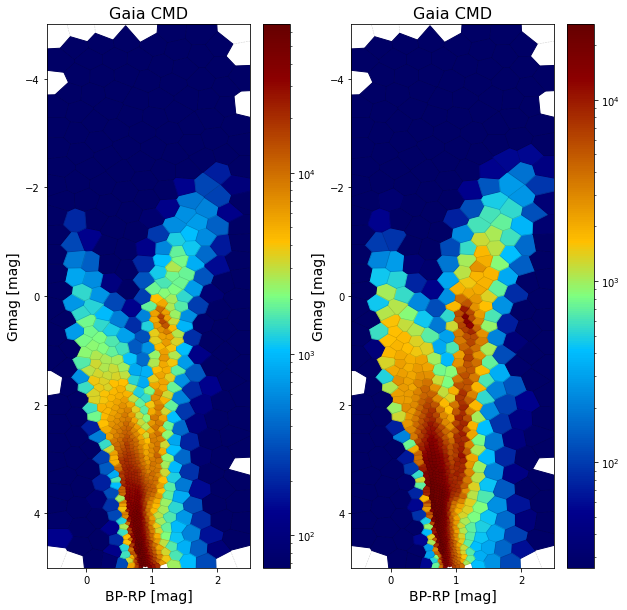

In [41]:
fno = '../dat/cmd_grid/gaia3_cmd_full_all_voron.SN.6.5.SCALE.1e5.h5'
pts_df = pd.read_hdf(fno,key='dat')


fig, axes = plt.subplots(1, 2, figsize=(10, 10))
plot_vor_density2(axes[0],pts_df[['pts_x', 'pts_y']].to_numpy(),
                      pts_df['dat'],[1e-3*pts_df['dat'].max(),pts_df['dat'].max()],
                      'Gaia CMD',scale='log')

ind = (np.abs(df['M_G'])<5) & (df['BP_RP']>-0.5) & (df['BP_RP']<2.5) & (df['ur']<1000)
pts_df['dat'] = make_vor_density(pts,df['BP_RP'][ind],df['M_G'][ind])
plot_vor_density2(axes[1],pts_df[['pts_x', 'pts_y']].to_numpy(),
                      pts_df['dat'],[1e-3*pts_df['dat'].max(),pts_df['dat'].max()],
                      'Gaia CMD',scale='log')
plt.show()

fno = '../dat/cmd_grid/gaia3_cmd_full_all_voron.SN.6.5.SCALE.1e5_kin_all.h5'
pts_df.to_hdf(fno,key='dat')


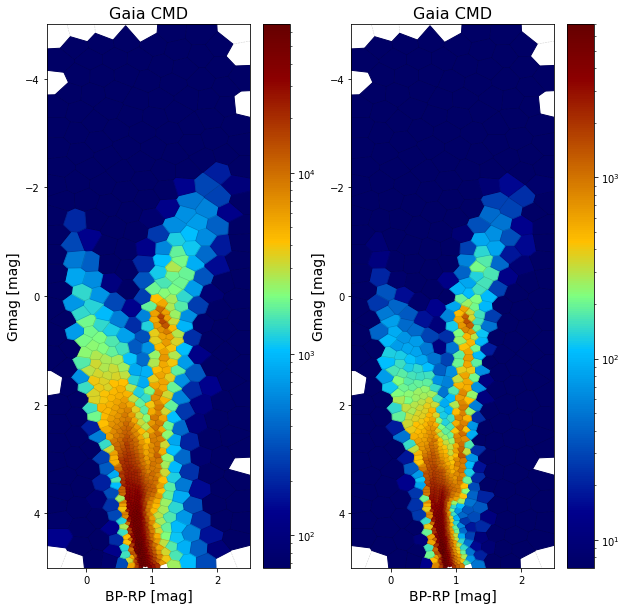

In [10]:
fno = '../dat/cmd_grid/gaia3_cmd_full_all_voron.SN.6.5.SCALE.1e5.h5'
pts_df = pd.read_hdf(fno,key='dat')


fig, axes = plt.subplots(1, 2, figsize=(10, 10))
plot_vor_density2(axes[0],pts_df[['pts_x', 'pts_y']].to_numpy(),
                      pts_df['dat'],[1e-3*pts_df['dat'].max(),pts_df['dat'].max()],
                      'Gaia CMD',scale='log')

ind = (df['Ag']<0.05) & (np.abs(df['M_G'])<5) & (df['BP_RP']>-0.5) & (df['BP_RP']<2.5)
pts_df['dat'] = make_vor_density(pts_df[['pts_x', 'pts_y']].to_numpy(),df['BP_RP'][ind],df['M_G'][ind])
plot_vor_density2(axes[1],pts_df[['pts_x', 'pts_y']].to_numpy(),
                      pts_df['dat'],[1e-3*pts_df['dat'].max(),pts_df['dat'].max()],
                      'Gaia CMD',scale='log')
plt.show()

fno = '../dat/cmd_grid/gaia3_cmd_full_all_voron.SN.6.5.SCALE.1e5_no_extinction_all.h5'
pts_df.to_hdf(fno,key='dat')
